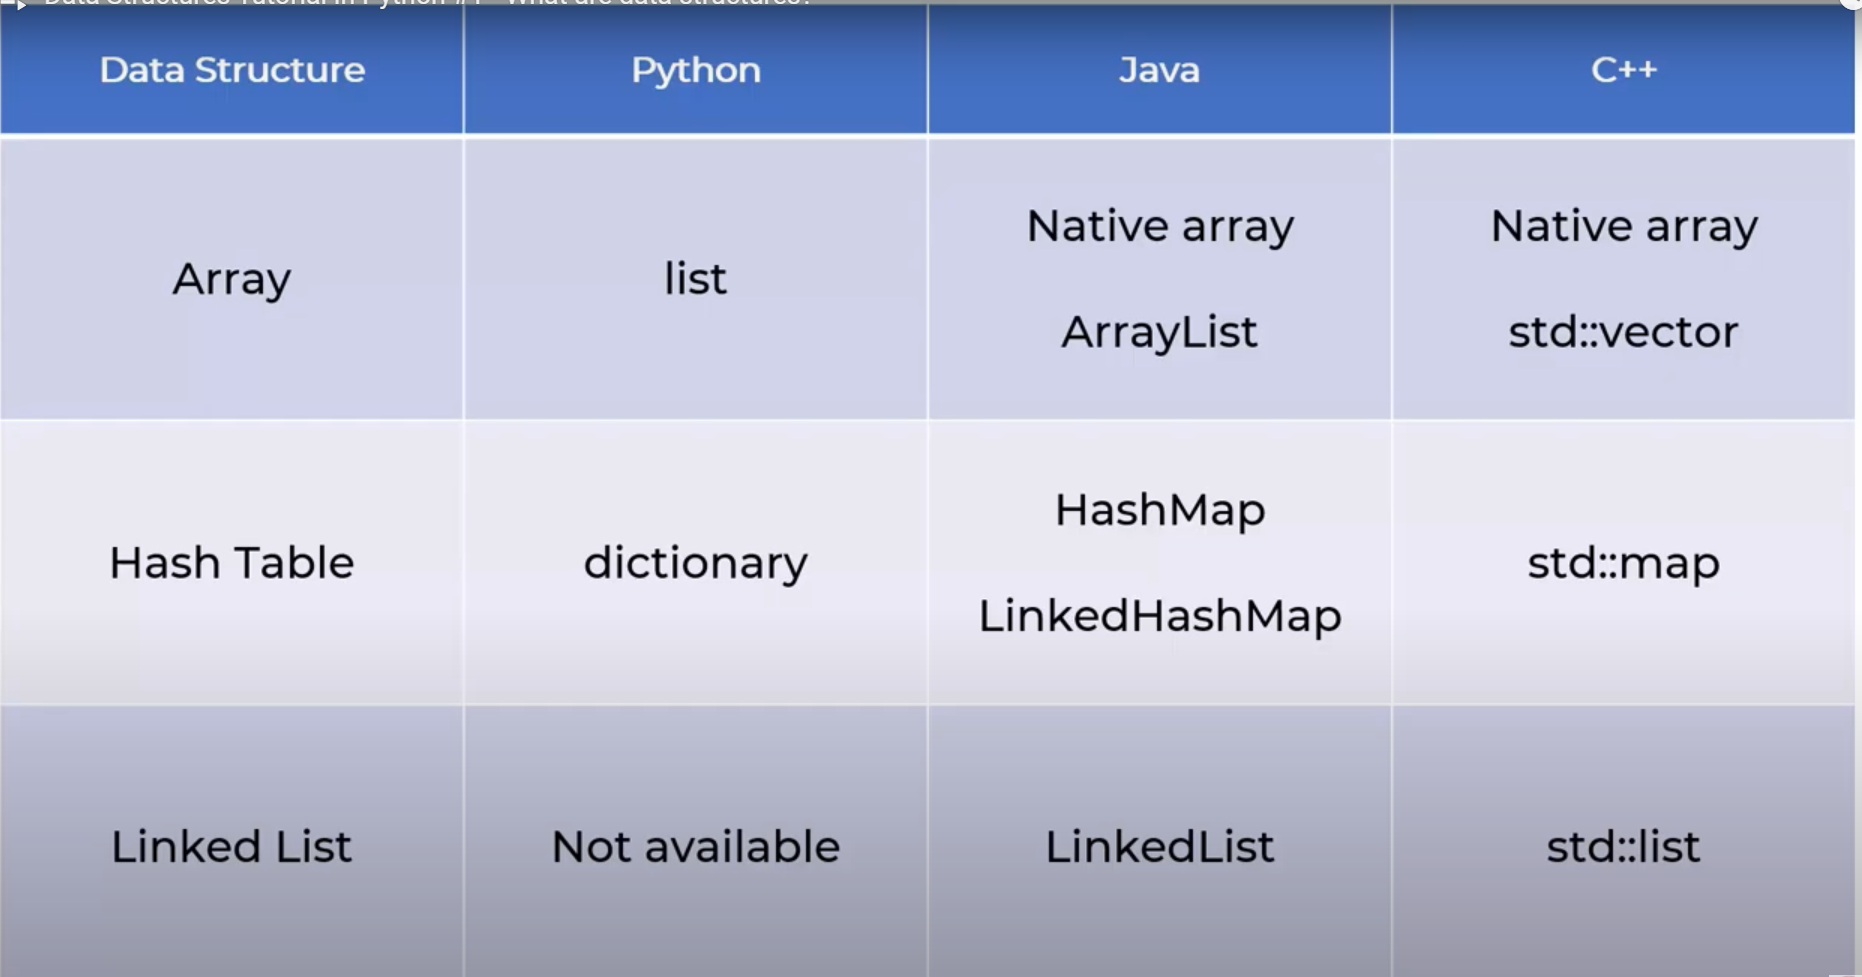

1.Big O notation
=========

Tip : Big - O cheat sheet
=========
https://www.bigocheatsheet.com/


1> time complexity

O(1), O(n), O(n^2), ...

2> space complexity : time complexity 만으로 충분하지 않을 때 log 로 줄일 수 있는지 고려해야 함.

O(logn)

In [6]:
# O(n^2)

def is_duplicate(numbers):
    for i in range(len(numbers)):
        for j in range(i+1,len(numbers)):
            if numbers[i]==numbers[j]:
                print(str(numbers[i])+" is a duplicate")
                break
                
numbers=[3,6,2,4,3,6,8,9]
import time

start=time.time()
is_duplicate(numbers)
print((time.time()-start)*1000,'ms')

3 is a duplicate
6 is a duplicate
1.0025501251220703 ms


2.Array
=========

Lookup by index = O(1) : index -> 램 참조 -> 값 출력

Lookup by value = O(n) : 값을 비교하여 index 찾기

Array traversal = O(n) : 모든 성분 출력

insertion = O(n) : 모든 성분을 밀어야하기 때문

Delete = O(n) : 모든 성분을 당겨야하기 때문

In python, list is implemented as dynamic array

In other languages like JAVA, C++ we have static and dynamic arrays both

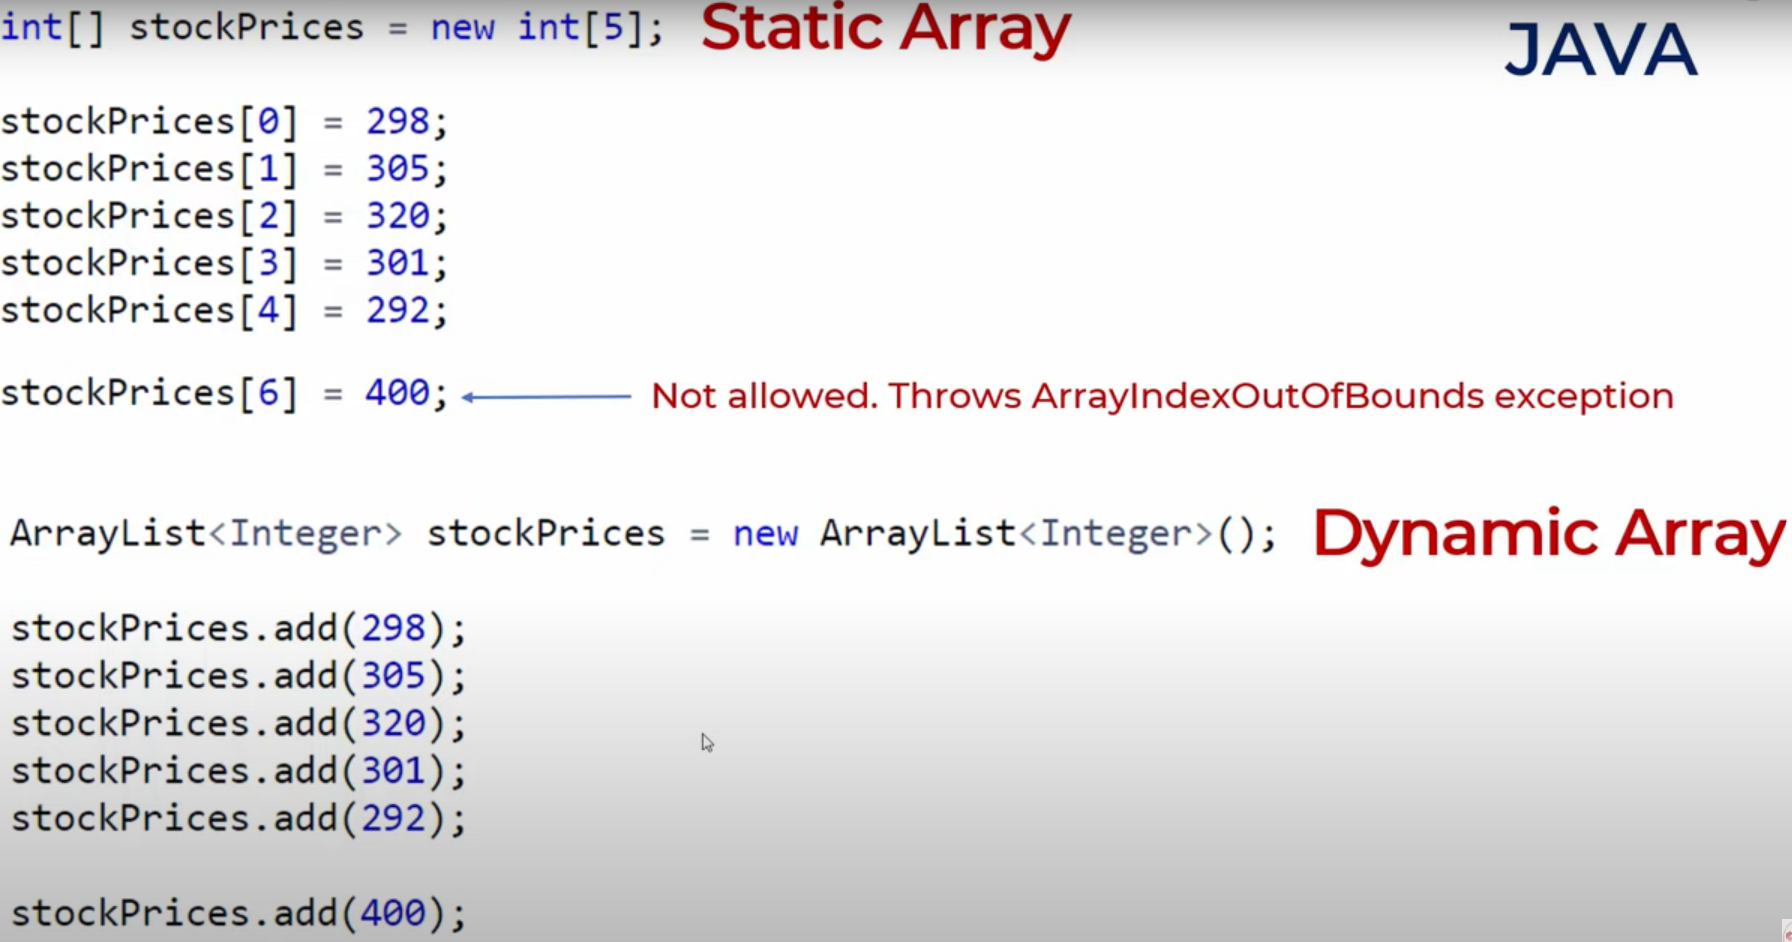

기본 Capacity 가 10개라면, dynamic array 를 생성하면 우선 메모리에서 10개를 할당한다. 그리고 11번째 원소가 들어오면 추가적으로 다른 위치에 10x2 = 20 개의 공간을 만든다. 다음은 20x3 = 60 ... 이런식으로 geometric 하게 나아간다.

In [15]:
#Ex1
E=[2200,2350,2600,2130,2190]
print("In Feb, how many dollars you spent extra compare to January?\n",E[1]-E[0])
print("Find out your total expense in first quarter (first three months) of the year.\n",sum(E[:3]))
print("Find out if you spent exactly 2000 dollars in any month :\n",2000 in E)
print("June month just finished and your expense is 1980 dollar. Add this item to our monthly expense list")
E.append(1980)
print(E)
print("You returned an item that you bought in a month of April and got a refund of 200$. Make a correction to your monthly expense list based on this")
E[3]=E[3]-200
print(E)


In Feb, how many dollars you spent extra compare to January?
 150
Find out your total expense in first quarter (first three months) of the year.
 7150
Find out if you spent exactly 2000 dollars in any month :
 False
June month just finished and your expense is 1980 dollar. Add this item to our monthly expense list
[2200, 2350, 2600, 2130, 2190, 1980]
You returned an item that you bought in a month of April and got a refund of 200$. Make a correction to your monthly expense list based on this
[2200, 2350, 2600, 1930, 2190, 1980]


In [29]:
#Ex2
heros=['spider man','thor','hulk','iron man','captain america']
print(len(heros))
heros.append('black panther')
print(heros)
del heros[-1]
heros.insert(3,'black panther')
print(heros)
heros[1:3]=['doctor strange']
print(heros)
heros.sort()
print(heros)

5
['spider man', 'thor', 'hulk', 'iron man', 'captain america', 'black panther']
['spider man', 'thor', 'hulk', 'black panther', 'iron man', 'captain america']
['spider man', 'doctor strange', 'black panther', 'iron man', 'captain america']
['black panther', 'captain america', 'doctor strange', 'iron man', 'spider man']


In [35]:
#Ex3
maxnumber=int(input())
answer=[i for i in range(maxnumber) if i%2==1]
print(answer)

20
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


3.Linked List
=========
list는 메모리를 할당하고 추가적인 공간이 필요하면 추가로 할당이 필요했다. linked list 는 본인의 위치와 함께 다음 원소의 위치를 함께 보관한다. 때문에 원소 삭제나 삽입이 비교적 자유롭다. doubly linked list 는 본인의 위치, 다음 원소의 위치, 이전 원소의 위치를 함께 보관한다.

linked list 의 계산량

insert/delete at beginning = O(1)

insert/delete at end = O(n)

doubly linked list 는 end 에서 insert/delete 적용해도 O(1) 이다. 다만 둘 모두 중간쪽으로 갈수록 끝에서부터 찾아가야 하므로 O(n) 이 된다. 아래는 linked list 의 insertion 예시이다.


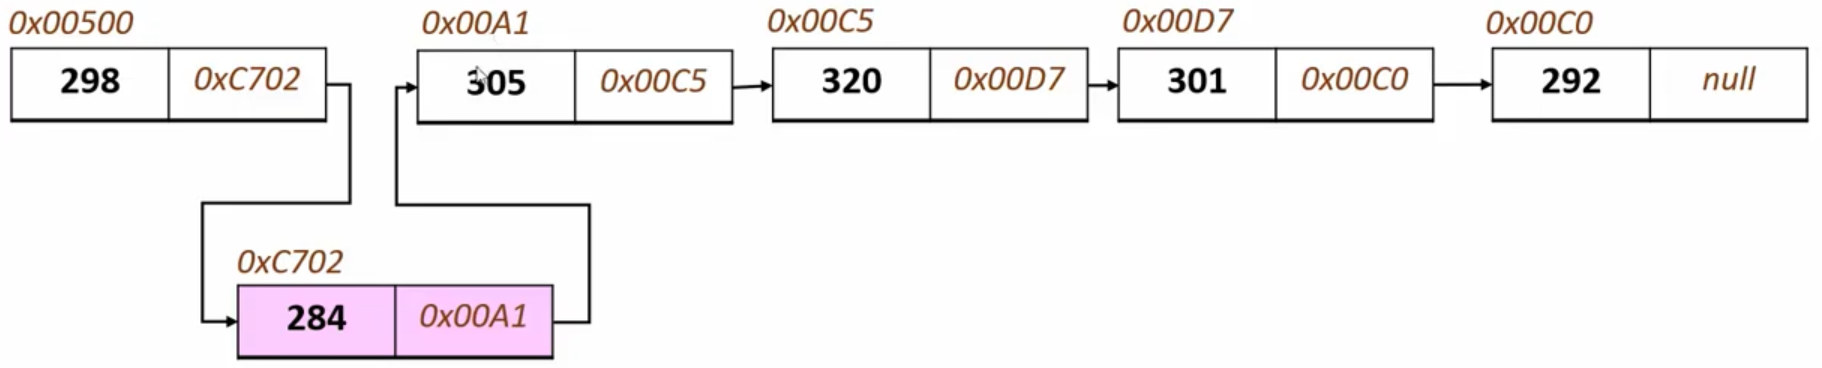

In [55]:
class Node:
    def __init__(self, data=None, nextnode=None):
        self.data=data
        self.next=nextnode

class LinkedList:
    def __init__(self):
        self.head=None
    
    def insert_at_beginning(self,data):
        self.head=Node(data,self.head)
        
    def insert_at_end(self,data):
        if self.head is None:
            self.head=Node(data,None)
            return
        itr=self.head
        while itr.next:
            itr=itr.next
        itr.next=Node(data,None)
        
    def insert_values_from_beginning(self,data_list):
        for data in data_list[::-1]:
            self.insert_at_beginning(data)
        
    def printlist(self):
        if self.head is None:
            print("Linked list is empty")
            return
        
        itr=self.head
        liststr=''
        while itr:
            liststr+=str(itr.data)+'-->'
            itr=itr.next
            
        print(liststr)
        
    def get_length(self):
        count=0
        itr=self.head
        while itr:
            itr=itr.next
            count+=1
        return count
        
    def remove_at(self,index):
        if index<0 or index>self.get_length():
            raise Exception("Invalid index, index must be larger than 0 and smaller than",self.get_length())
            
        if index==0:
            self.head=self.head.next
            return
            
        itr=self.head
        count=0
        while count<index-1:
            itr=itr.next
            count+=1
        itr.next=itr.next.next
        
    def insert_at(self,index,data):
        if index<0 or index>self.get_length():
            raise Exception("Invalid index, index must be larger than 0 and smaller than",self.get_length())
        if index==0:
            self.insert_at_beginning(data)
        elif index==self.get_length():
            self.insert_at_end(self,data)
        else:
            itr=self.head
            count=0
            while count<index-1:
                itr=itr.next
                count+=1
            node=Node(data,itr.next)
            itr.next=node

        
if __name__=='__main__':
    ll=LinkedList()
    ll.insert_at_beginning(1)
    ll.insert_at_beginning(2)
    ll.insert_at_beginning(3)
    ll.insert_at_end(4)
    ll.insert_values_from_beginning([5,6,7])
    ll.printlist()
    print("length :",ll.get_length())
    ll.remove_at(1)
    ll.printlist()
    ll.insert_at(1,6)
    ll.printlist()
    pass

5-->6-->7-->3-->2-->1-->4-->
length : 7
5-->7-->3-->2-->1-->4-->
5-->6-->7-->3-->2-->1-->4-->


In [5]:
#Ex1
class Node:
    def __init__(self, data=None, nextnode=None):
        self.data=data
        self.next=nextnode

class LinkedList:
    def __init__(self):
        self.head=None
        
    def print(self):
        if self.head is None:
            print("Linked list is empty")
            return
        itr = self.head
        llstr = ''
        while itr:
            llstr += str(itr.data) + ' --> '
            itr = itr.next
        print(llstr)

    def insert_at_end(self, data):
        if self.head is None:
            self.head = Node(data, None)
            return

        itr = self.head

        while itr.next:
            itr = itr.next

        itr.next = Node(data, None)
    
    def insert_values(self, data_list):
        self.head = None
        for data in data_list:
            self.insert_at_end(data)
    
    def insert_after_value(self, data_after, data_to_insert):
        itr=self.head
        while itr:
            if itr.data==data_after:
                node=Node(data_to_insert,itr.next)
                itr.next=node
                return
            itr=itr.next
        raise Exception("No such value in this Linked list")
        
    def remove_by_value(self, data):
        itr=self.head
        if itr==None:
            print("This Linked list is empty")
        elif itr.data==data:
            self.head=itr.next
            return
        while itr.next:
            if itr.next.data==data:
                itr.next=itr.next.next
                return
            itr=itr.next
        #raise Exception("No such value in this Linked list")
        print("No such value in this Linked list")
        
if __name__=='__main__':
    ll = LinkedList()
    ll.insert_values(["banana","mango","grapes","orange"])
    ll.print()
    ll.insert_after_value("mango","apple") # insert apple after mango
    ll.print()
    ll.remove_by_value("orange") # remove orange from linked list
    ll.print()
    ll.remove_by_value("figs")
    ll.print()
    ll.remove_by_value("banana")
    ll.remove_by_value("mango")
    ll.remove_by_value("apple")
    ll.remove_by_value("grapes")
    ll.print()

banana --> mango --> grapes --> orange --> 
banana --> mango --> apple --> grapes --> orange --> 
banana --> mango --> apple --> grapes --> 
No such value in this Linked list
banana --> mango --> apple --> grapes --> 
Linked list is empty


In [12]:
#Ex2
class Node:
    def __init__(self, data=None, nextnode=None, prevnode=None):
        self.data = data
        self.next = nextnode
        self.prev = prevnode

class DoublyLinkedList:
    def __init__(self):
        self.head=None
        self.tail=None
        
    def print_forward(self):
        itr=self.head
        if itr==None:
            print("This DoublyLinkedList is empty")
        else:
            fstr=''
            while itr:
                fstr+=str(itr.data)+'-->'
                itr=itr.next
            print(fstr)
            
    def print_backward(self):
        itr=self.tail
        if itr==None:
            print("This DoublyLinkedList is empty")
        else:
            fstr=''
            while itr:
                fstr+=str(itr.data)+'<--'
                itr=itr.prev
            print(fstr)
            
    def insert_at_beginning(self,data):
        if self.head==None:
            node=Node(data,None,None)
            self.head=node
            self.tail=node
        else:
            self.head=Node(data,self.head,None)
        
    def insert_at_end(self,data):
        if self.tail==None:
            self.tail=Node(data,None,None)
            self.head=self.tail
        else:
            self.tail=Node(data,None,self.tail)
    
    def insert_values_from_beginning(self,data_list):
        for data in data_list[::-1]:
            self.insert_at_beginning(data)
    
    def insert_values_from_end(self,data_list):
        for data in data_list:
            self.insert_at_end(data)

if __name__=='__main__':
    dll=DoublyLinkedList()
    dll.insert_values_from_beginning([1,2,3,4,5,6])
    dll.print_forward()
    dll.print_backward()
    
###################### 다른 참조문헌도 tail 은 안쓴다. 구현 가능한 방법이 없을까 싶은데 안되는듯..?

1-->2-->3-->4-->5-->6-->
6<--


4.Hash Table
========
dictionary gives O(1) using the hash function. dictionary is a specific implementation of hash table(=hash map) in python.


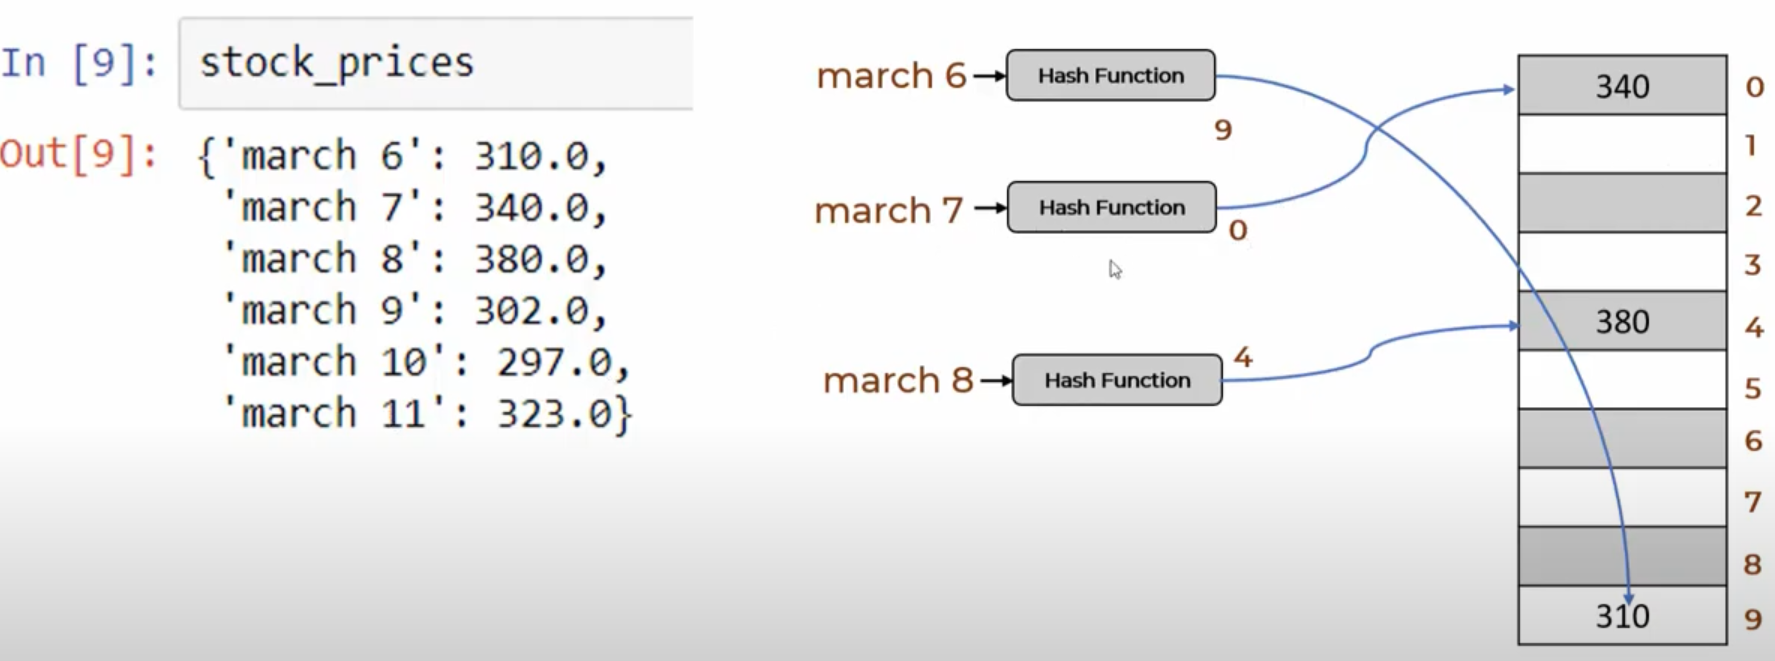

다음은 hash function 의 예시이다. 이를 구현해보자. (파이썬에는 내장으로 hash 라는 함수가 있다. collision 까지 모두 고려한 것)

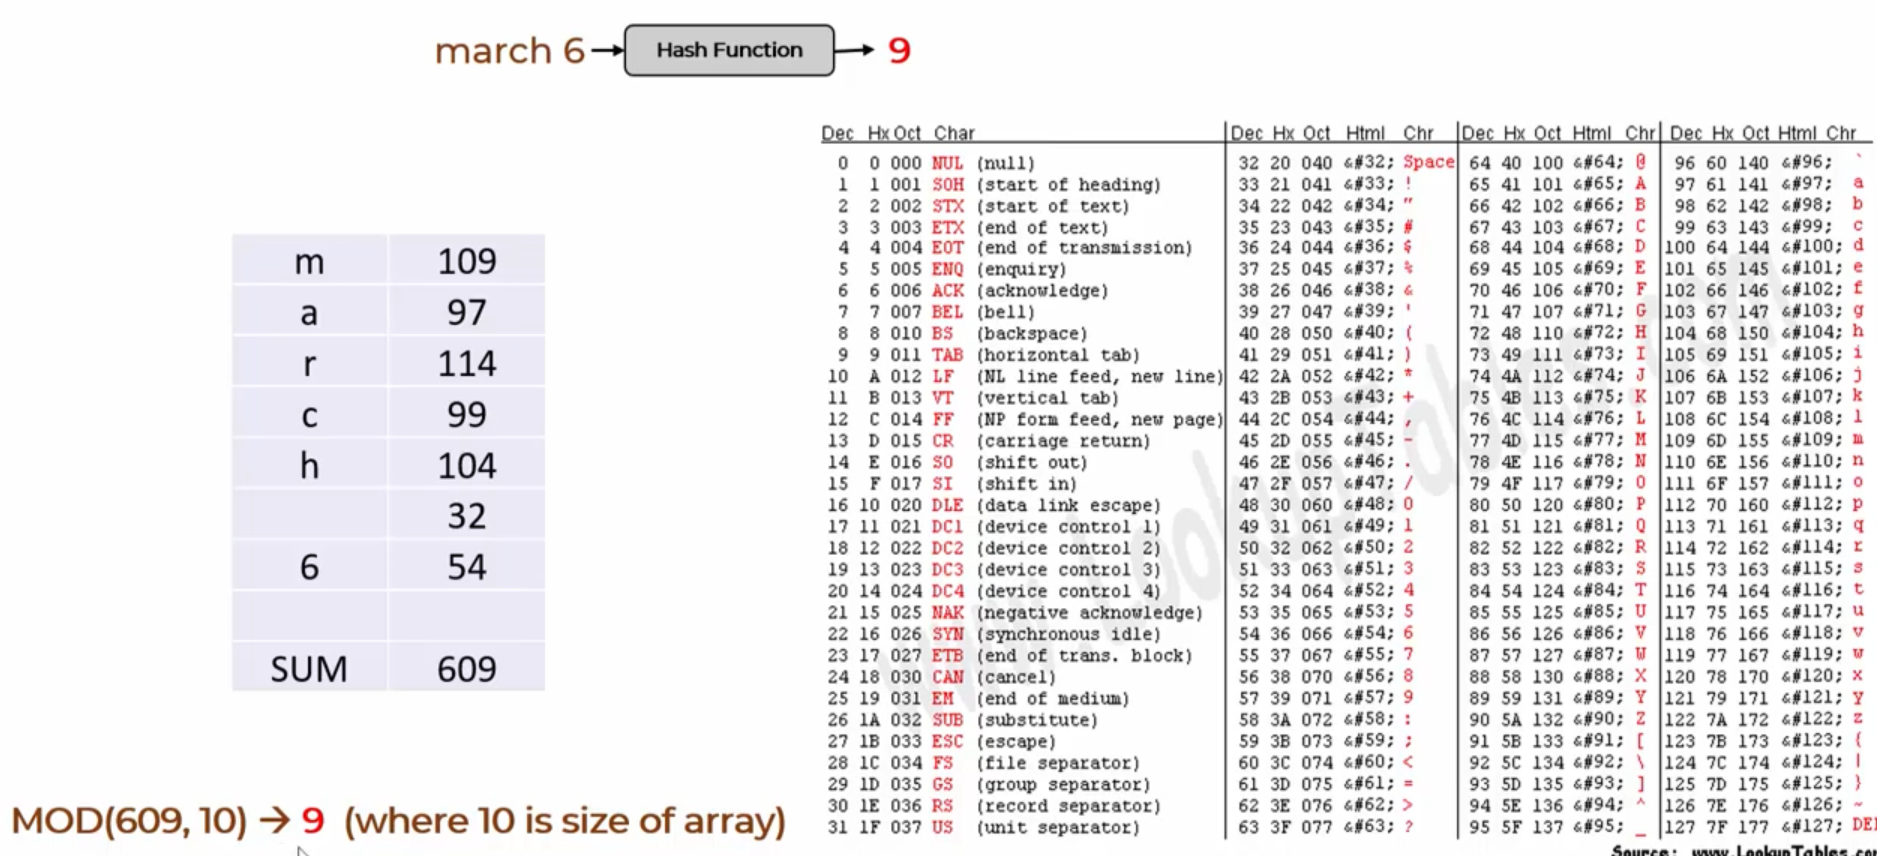

In [2]:
def get_hash(key):
    h=0
    for char in key:
        h+=ord(char)                 #ord 는 아스키코드값을 반환해주는 녀석이다. str 하나만 들어와야 함.
    return h%1000
get_hash('m')

109

In [6]:
#not handling collision
class HashTable:
    def __init__(self):
        self.MAX=100
        self.arr=[None for i in range(self.MAX)]
        
    def get_hash(self,key):
        h=0
        for char in key:
            h+=ord(char)
        return h%self.MAX
    
    def __setitem__(self,key,val):
        h=self.get_hash(key)
        self.arr[h]=val
        
    def __getitem__(self,key):
        h=self.get_hash(key)
        return self.arr[h]
    
    def __delitem__(self,key):
        h=self.het_hash(key)
        self.arr[h]=None
        
t=HashTable()
t['march 6']=130
t['march 1']=20
t['dec 17']=27
print(t.arr)

[None, None, None, None, 20, None, None, None, None, 130, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 27, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


다음은 hash table 의 collision 을 없애기 위해 linked list 를 활용한 chaining 의 예시이다.

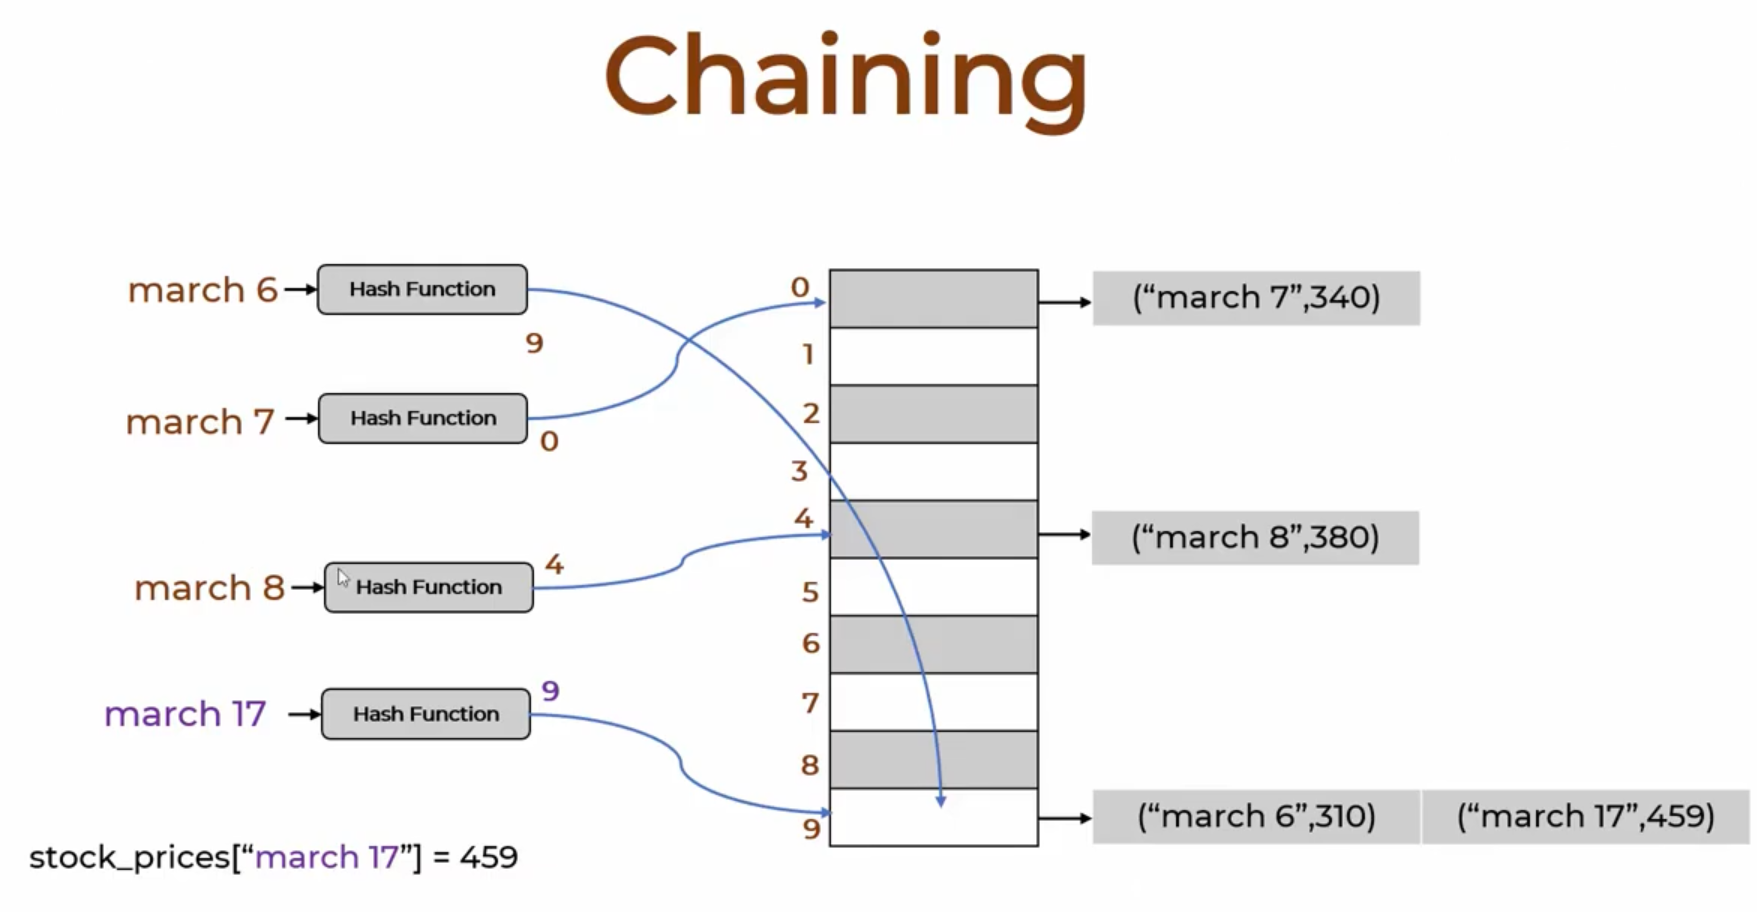

다음은 hash table 의 collision 을 없애기 위해 Linear Probing 를 활용한  예시이다.

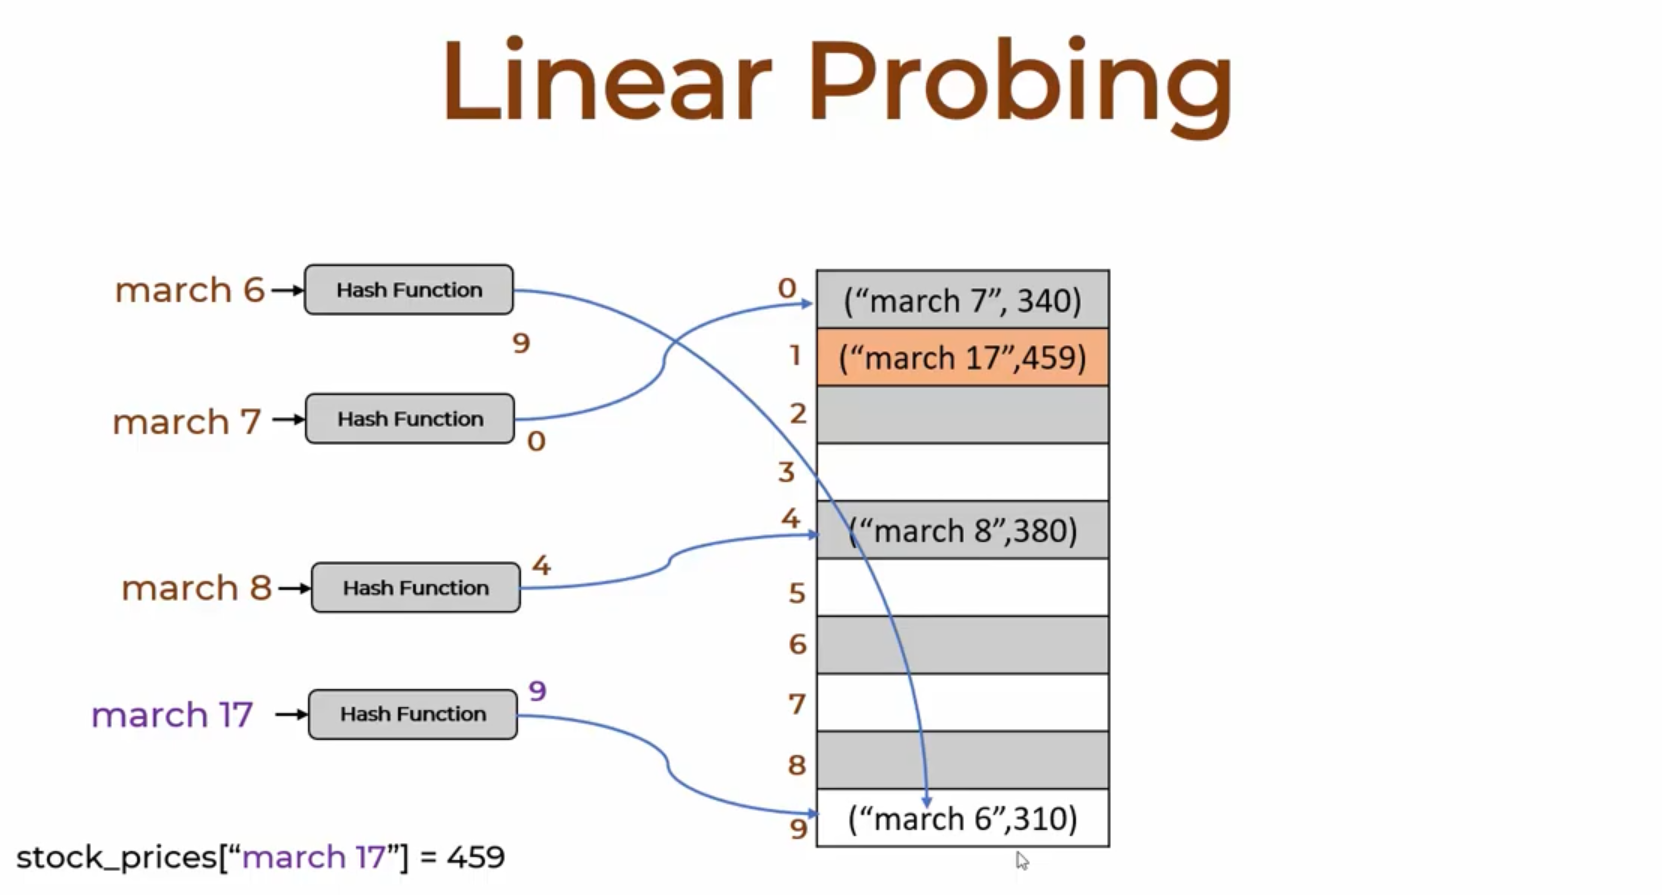

In [10]:
#list 를 활용한 예시
class HashTable:
    def __init__(self):
        self.MAX=10
        self.arr=[[] for i in range(self.MAX)]
        
    def get_hash(self,key):
        h=0
        for char in key:
            h+=ord(char)
        return h%self.MAX
    
    def __setitem__(self,key,val):
        h=self.get_hash(key)
        #for update
        found=False
        for idx,elt in enumerate(self.arr[h]):
            if elt[0]==key:
                self.arr[h][idx]=(key,val)
                found=True
                break
        #for new one
        if not found:
            self.arr[h].append((key,val))
        
    def __getitem__(self,key):
        h=self.get_hash(key)
        for elt in self.arr[h]:
            if elt[0]==key:
                return elt[1]
    
    def __delitem__(self,key):
        h=self.get_hash(key)
        for idx,elt in enumerate(self.arr[h]):
            if elt[0]==key:
                del self.arr[h][idx]
                break
t=HashTable()
t['AA']=120
t['BB']=130
t['CC']=3
t['DD']=57
t['EE']=668
t['EE']=2
t['FF']=45
print(t.arr)

[[('AA', 120), ('FF', 45)], [], [('BB', 130)], [], [('CC', 3)], [], [('DD', 57)], [], [('EE', 2)], []]


In [11]:
t['FF']

45

In [55]:
#Ex1
temperature=[]
with open('nyc_weather.csv') as f:
    passer=False
    for line in f:
        if passer==True:
            tokens=line.split(',')
            #day=tokens[0]
            temp=float(tokens[1])
            temperature.append(temp)
        passer=True
print("average temperature :",sum(temperature[:7])/7)
print("max temperatre in first 10 :",max(temperature[:10]))

average temperature : 31.285714285714285
max temperatre in first 10 : 38.0


In [22]:
#Ex2
temperature={}
with open('nyc_weather.csv') as f:
    passer=False
    for line in f:
        if passer==True:
            tokens=line.split(',')
            day=tokens[0]
            temp=float(tokens[1])
            temperature[day]=temp
        passer=True
print("temperature on Jan 9 :",temperature['Jan 9'])
print("temperature on Jan 4 :",temperature['Jan 4'])

temperature on Jan 9 : 35.0
temperature on Jan 4 : 34.0


In [37]:
#Ex3
dictionary={}
poem=[]
with open('poem.txt', encoding='UTF8') as f:
    lines=f.readlines()
    for line in lines:
        poem+=line.split(' ')
for elt in poem:
    if elt in dictionary:
        dictionary[elt]+=1
    else:
        dictionary[elt]=1
print(dictionary)

{'Two': 2, 'roads': 2, 'diverged': 2, 'in': 3, 'a': 3, 'yellow': 1, 'wood,\n': 1, 'And': 6, 'sorry': 1, 'I': 8, 'could': 1, 'not': 1, 'travel': 1, 'both\n': 1, 'be': 2, 'one': 3, 'traveler,': 1, 'long': 1, 'stood\n': 1, 'looked': 1, 'down': 1, 'as': 5, 'far': 1, 'could\n': 1, 'To': 1, 'where': 1, 'it': 2, 'bent': 1, 'the': 8, 'undergrowth;\n': 1, '\n': 3, 'Then': 1, 'took': 2, 'other,': 1, 'just': 1, 'fair,\n': 1, 'having': 1, 'perhaps': 1, 'better': 1, 'claim,\n': 1, 'Because': 1, 'was': 1, 'grassy': 1, 'and': 3, 'wanted': 1, 'wear;\n': 1, 'Though': 1, 'for': 2, 'that': 3, 'passing': 1, 'there\n': 1, 'Had': 1, 'worn': 1, 'them': 1, 'really': 1, 'about': 1, 'same,\n': 1, 'both': 1, 'morning': 1, 'equally': 1, 'lay\n': 1, 'In': 1, 'leaves': 1, 'no': 1, 'step': 1, 'had': 1, 'trodden': 1, 'black.\n': 1, 'Oh,': 1, 'kept': 1, 'first': 1, 'another': 1, 'day!\n': 1, 'Yet': 1, 'knowing': 1, 'how': 1, 'way': 1, 'leads': 1, 'on': 1, 'to': 1, 'way,\n': 1, 'doubted': 1, 'if': 1, 'should': 1, 'ever

In [54]:
#Ex4
#list 를 활용한 예시
class HashTable:
    def __init__(self):
        self.MAX=5
        self.arr=[None for i in range(self.MAX)]
        
    def get_hash(self,key):
        h=0
        for char in key:
            h+=ord(char)
        return h%self.MAX
    
    def __setitem__(self,key,val):
        h=self.get_hash(key)
        for i in range(self.MAX):
            hh=(h+i)%self.MAX
            if self.arr[hh]==None or self.arr[hh][0]==key:
                self.arr[hh]=(key,val)
                return
        for i in range(self.MAX):
            hh=(h+i)%self.MAX
            if self.arr[hh]=='DEL':
                self.arr[hh]=(key,val)
                return
        print("this hash table is full")
        
    def __getitem__(self,key):
        h=self.get_hash(key)
        for i in range(self.MAX):
            hh=(h+i)%self.MAX
            if self.arr[hh][0]==key:
                return self.arr[hh][1]
    
    def __delitem__(self,key):
        h=self.get_hash(key)
        for i in range(self.MAX):
            hh=(h+i)%self.MAX
            if self.arr[hh][0]==key:
                self.arr[hh]='DEL'
                return
        print("target is not in this hash table")
t=HashTable()
t['AA']=120
t['BB']=130
t['CC']=3
t['DD']=57
t['EE']=668
print(t.arr)
del t['CC']
print(t.arr)
del t['AA']
print(t.arr)
t['FF']=45
print(t.arr)
t['AA']=2
print(t.arr)
del t['FF']
print(t.arr)
t['AA']=3
print(t.arr)

[('AA', 120), ('DD', 57), ('BB', 130), ('EE', 668), ('CC', 3)]
[('AA', 120), ('DD', 57), ('BB', 130), ('EE', 668), 'DEL']
['DEL', ('DD', 57), ('BB', 130), ('EE', 668), 'DEL']
[('FF', 45), ('DD', 57), ('BB', 130), ('EE', 668), 'DEL']
[('FF', 45), ('DD', 57), ('BB', 130), ('EE', 668), ('AA', 2)]
['DEL', ('DD', 57), ('BB', 130), ('EE', 668), ('AA', 2)]
['DEL', ('DD', 57), ('BB', 130), ('EE', 668), ('AA', 3)]


5.Stack
=========
Last In First Out : LIFO

Push/Pop : O(1)  ... pust 는 append 이고 pop 은 pop 이다.

Searching element : O(n)

list 는 dynamic list 이기 때문에 우리는 collections 의 deque 를 사용한다. static 인지는 모르겠으나 memory efficient 하다고 함.

In [59]:
#Ex1>
from collections import deque
class Stack:
    def __init__(self):
        self.container = deque()
    
    def push(self,val):
        self.container.append(val)
        
    def pop(self):
        return self.container.pop()
    
    def peek(self):
        return  self.container[-1]
    
    def is_empty(self):
        return len(self.container)==0
    
    def size(self):
        return len(self.container)
    
def reverse_string(st):
    temp=Stack()
    for s in st:
        temp.push(s)
    result=''
    for _ in range(temp.size()):
        result+=temp.pop()
    print(result)

if __name__=='__main__':
    reverse_string("We will conquere COVID-19")

91-DIVOC ereuqnoc lliw eW


In [66]:
#Ex2>
from collections import deque
class Stack:
    def __init__(self):
        self.container = deque()
    
    def push(self,val):
        self.container.append(val)
        
    def pop(self):
        return self.container.pop()
    
    def peek(self):
        return  self.container[-1]
    
    def is_empty(self):
        return len(self.container)==0
    
    def size(self):
        return len(self.container)
    
def is_balanced(st):
    temp=Stack()
    paranthesis={'{':'}','(':')','[':']'}
    for s in st:
        if s in paranthesis:                
            temp.push(s)
        elif temp.size()>0:
            if s==paranthesis[temp.peek()]:
                temp.pop()
        elif s in paranthesis.values():
            return False
    return temp.is_empty()
    
if __name__=='__main__':
    print(is_balanced("({a+b})") )
    print(is_balanced("))((a+b}{") )
    print(is_balanced("((a+b))"))
    print(is_balanced("))") )
    print(is_balanced("[a+b]*(x+2y)*{gg+kk}"))

True
False
True
False
True


6.Queue
========
First In First Out : FIFO

enqeue : appendleft
 
dequeue : pop

In [1]:
#Ex1>
from threading import Thread
from collections import deque
import time

class Queue:
    
    def __init__(self):
        self.buffer = deque()
    
    def enqueue(self, val):
        self.buffer.appendleft(val)
        
    def dequeue(self):
        return self.buffer.pop()
    
    def is_empty(self):
        return len(self.buffer)==0
    
    def size(self):
        return len(self.buffer)
    
orders=['pizza','samosa','pasta','biryani','burger']
que=Queue()
def Place_Order(orders):
    for order in orders:
        print("ordered",order)
        que.enqueue(order)
        time.sleep(0.5)
        
def Serve_Order():
    while True:
        if not que.is_empty():
            served=que.dequeue()
            print("served ",served)
            time.sleep(2)
        else:
            break

if __name__=='__main__':
    t1=Thread(target=Place_Order,args=(orders,))
    t2=Thread(target=Serve_Order)
    t1.start()
    time.sleep(1)
    t2.start()
    t1.join()
    t2.join()
    print("Done!")

ordered pizza
ordered samosa
served ordered pizza
 pasta
ordered biryani
ordered burger
served  samosa
served  pasta
served  biryani
served  burger
Done!


In [7]:
#Ex2>
from collections import deque
import time

class Queue:
    
    def __init__(self):
        self.buffer = deque()
    
    def enqueue(self, val):
        self.buffer.appendleft(val)
        
    def dequeue(self):
        return self.buffer.pop()
    
    def is_empty(self):
        return len(self.buffer)==0
    
    def size(self):
        return len(self.buffer)
    
    def front(self):
        return self.buffer[-1]
    
def simulation():
    que=Queue()
    que.enqueue('1')
    while True:
        L=que.size()
        for _ in range(L):
            temp=que.dequeue()
            que.enqueue(temp+'0')
            que.enqueue(temp+'1')
            print(temp)
            if temp=='1010':
                return
if __name__=='__main__':
    simulation()

1
10
11
100
101
110
111
1000
1001
1010
